In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
df = pd.read_csv("clean_salary.csv")
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,clean_job_title
0,0,2023,EN,FT,Admin & Data Analyst,50000,USD,50000,DE,0,DE,M,Data Analyst
1,1,2024,SE,FT,Data Management Specialist,200400,USD,200400,US,0,US,M,Data Management Specialist
2,2,2024,SE,FT,Data Management Specialist,116500,USD,116500,US,0,US,M,Data Management Specialist
3,3,2024,SE,FT,Data Scientist,188500,USD,188500,US,0,US,M,Data Scientist
4,4,2024,SE,FT,Data Scientist,165100,USD,165100,US,0,US,M,Data Scientist
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11565,11565,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L,Data Scientist
11566,11566,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L,Data Scientist
11567,11567,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S,Data Scientist
11568,11568,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L,Data Analyst


In [7]:
df.drop(columns = ["Unnamed: 0", "job_title"], inplace = True)

In [8]:
df.rename(columns = {"clean_job_title": "job_title"}, inplace  = True)

In [9]:
df.rename(columns = {"clean_job_title": "job_title"}, inplace  = True)

In [10]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'salary',
       'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size', 'job_title'],
      dtype='object')

In [11]:
df["is_india"] = np.where(df["company_location"] == "IN", "IN", "OTH")

In [12]:
df["job_title"].unique()

array(['Data Analyst', 'Data Management Specialist', 'Data Scientist',
       'Data Product Manager', 'Data Engineer', 'Data Manager',
       'Data Specialist', 'Head of Data', 'Prompt Engineer', 'Data Lead',
       'Data Developer', 'Data Strategist', 'Data Quality Manager',
       'AI Product Manager', 'Data Product Owner',
       'Data Strategy Manager', 'Autonomous Vehicle Technician',
       'Manager Data Management'], dtype=object)

In [13]:
title_list = ["Data Analyst", 'Data Scientist', 'Data Engineer']
df_1  = df[df["job_title"].isin(title_list)]
df_1.head()

,work_year,experience_level,employment_type,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_title,is_india
0,2023,EN,FT,50000,USD,50000,DE,0,DE,M,Data Analyst,OTH
3,2024,SE,FT,188500,USD,188500,US,0,US,M,Data Scientist,OTH
4,2024,SE,FT,165100,USD,165100,US,0,US,M,Data Scientist,OTH
7,2024,MI,FT,128600,USD,128600,US,0,US,M,Data Engineer,OTH
8,2024,MI,FT,100000,USD,100000,US,0,US,M,Data Engineer,OTH


In [14]:
mask = df_1["experience_level"] == "EN"
temp_df = df_1[mask].groupby(by = ["is_india", "job_title"])["salary_in_usd"].mean().reset_index()
temp_df

,is_india,job_title,salary_in_usd
0,IN,Data Analyst,22944.333333
1,IN,Data Engineer,20553.000000
2,IN,Data Scientist,31810.800000
3,OTH,Data Analyst,78640.014620
4,OTH,Data Engineer,98698.232432
5,OTH,Data Scientist,98328.094241


In [15]:
temp_df["salary_in_inr"] = round(df["salary_in_usd"] * 83, 2)

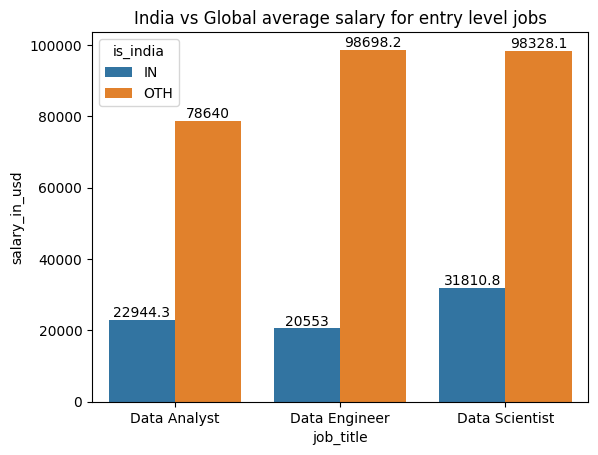

In [16]:

ax = sns.barplot(data = temp_df, x = "job_title", y = "salary_in_usd", hue = "is_india")
for con in ax.containers:
  ax.bar_label(con)
# plt.grid(True)
plt.title("India vs Global average salary for entry level jobs")
plt.show()

Q.2

In [17]:
temp_df = df_1[df_1["job_title"] == "Data Scientist"]
temp_df = temp_df.groupby(by = "work_year")["salary_in_usd"].mean().reset_index()
temp_df

,work_year,salary_in_usd
0,2020,123309.771429
1,2021,99787.567010
2,2022,139186.168478
3,2023,169261.675176
4,2024,162042.376771


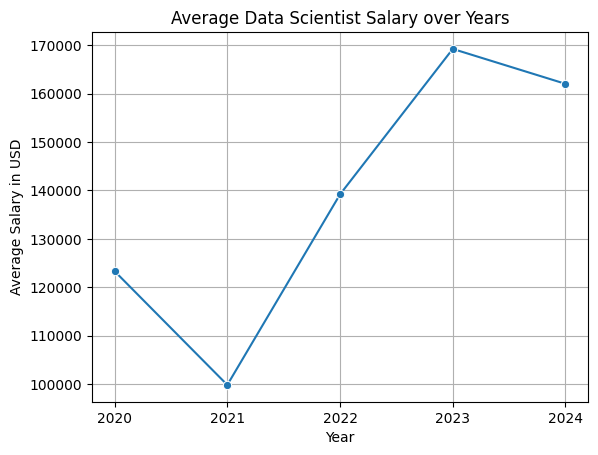

In [18]:
sns.lineplot(data = temp_df, x= "work_year", y = "salary_in_usd", marker = "o")
plt.grid(True)
plt.xticks(temp_df["work_year"])
plt.title("Average Data Scientist Salary over Years")
plt.xlabel("Year")
plt.ylabel("Average Salary in USD")
plt.show()

In [19]:
temp_df = df_1.groupby(by = ["work_year", "job_title"])["salary_in_usd"].mean().reset_index()
temp_df

,work_year,job_title,salary_in_usd
0,2020,Data Analyst,68014.666667
1,2020,Data Engineer,93310.120000
2,2020,Data Scientist,123309.771429
3,2021,Data Analyst,85159.108108
4,2021,Data Engineer,103472.620253
5,2021,Data Scientist,99787.567010
6,2022,Data Analyst,112552.908356
7,2022,Data Engineer,142876.340909
8,2022,Data Scientist,139186.168478
9,2023,Data Analyst,115237.954203


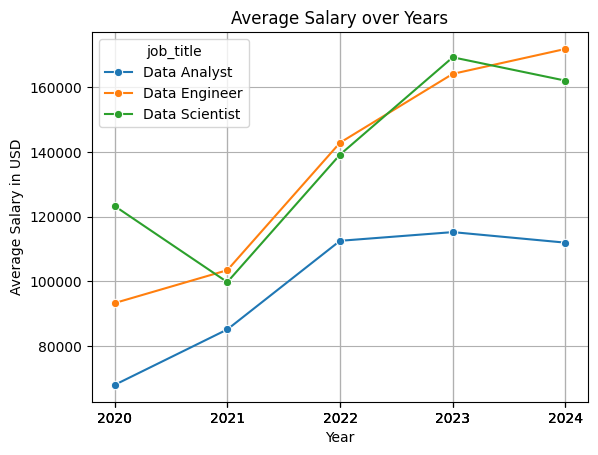

In [20]:
sns.lineplot(data = temp_df, x= "work_year", y = "salary_in_usd", marker = "o", hue = "job_title")
plt.grid(True)
plt.xticks(temp_df["work_year"])
plt.title("Average Salary over Years")
plt.xlabel("Year")
plt.ylabel("Average Salary in USD")
plt.show()

Q.3

In [21]:
mask = (df_1["job_title"] == "Data Scientist") | (df_1["job_title"] == "Data Engineer")
temp_df = df_1[mask].groupby(by = "job_title")["salary_in_usd"].mean().reset_index()
temp_df

,job_title,salary_in_usd
0,Data Engineer,160552.058800
1,Data Scientist,161909.429947


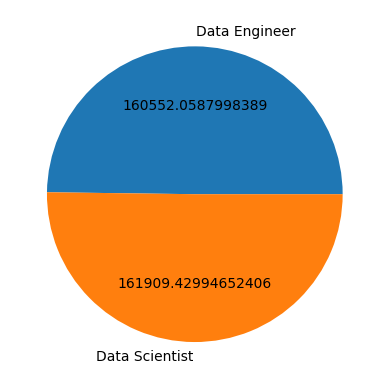

In [22]:
p, tx, autotexts = plt.pie(temp_df["salary_in_usd"], labels = temp_df["job_title"], autopct = "")
for i, a in enumerate(autotexts):
    a.set_text("{}".format(temp_df["salary_in_usd"][i]))

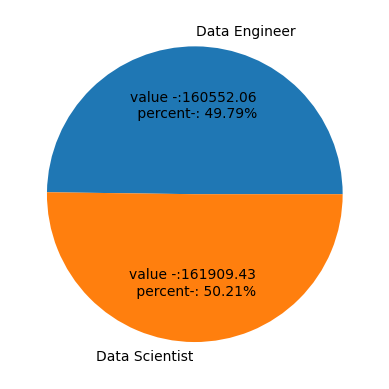

In [23]:
def value_per(x):
  num = x/100 * temp_df["salary_in_usd"].sum()
  return f"value -:{round(num,2)} \n percent-: {round(x,2)}%"
plt.pie(temp_df["salary_in_usd"], labels = temp_df["job_title"], autopct = value_per)
plt.show()

Q.4

In [24]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'salary',
       'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size', 'job_title',
       'is_india'],
      dtype='object')

In [25]:
df["company_size"].unique()

array(['M', 'L', 'S'], dtype=object)

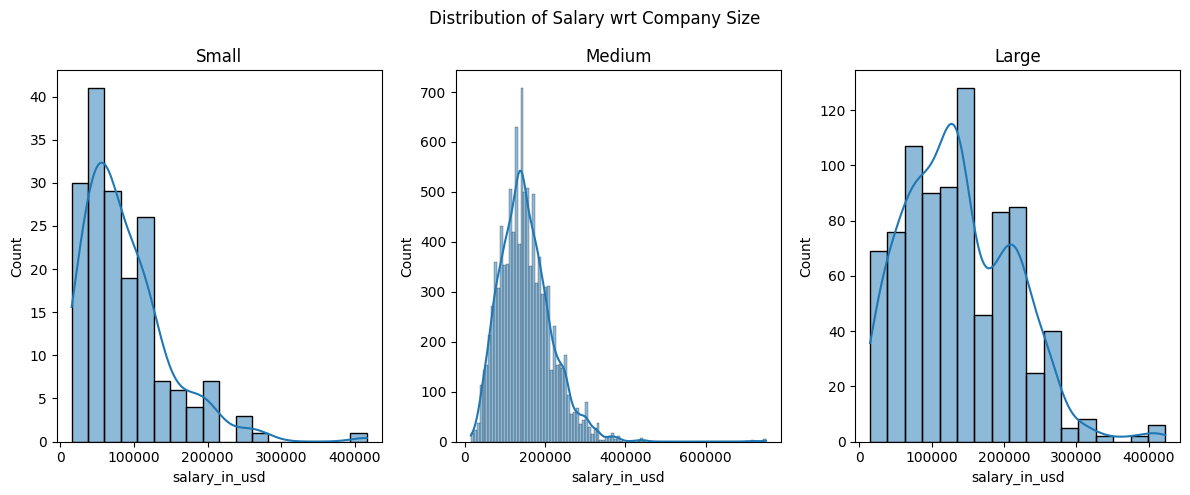

In [26]:
fig,axs = plt.subplots(1,3, figsize = (12,5))
sns.histplot(df[df["company_size"] == "S"]["salary_in_usd"], ax = axs[0], kde = True)
axs[0].set_title("Small")
sns.histplot(df[df["company_size"] == "M"]["salary_in_usd"], ax = axs[1], kde = True)
axs[1].set_title("Medium")
sns.histplot(df[df["company_size"] == "L"]["salary_in_usd"], ax = axs[2], kde = True)
axs[2].set_title("Large")
plt.suptitle("Distribution of Salary wrt Company Size")
plt.tight_layout()
plt.show()

Q.5

In [27]:
df_1.columns

Index(['work_year', 'experience_level', 'employment_type', 'salary',
       'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size', 'job_title',
       'is_india'],
      dtype='object')

<Axes: xlabel='job_title', ylabel='salary_in_usd'>

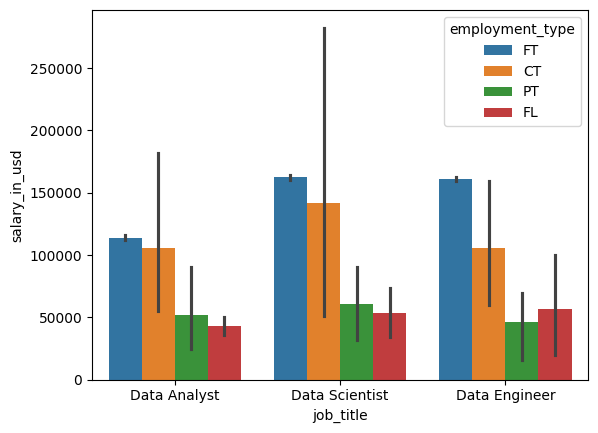

In [28]:
sns.barplot(data = df_1, x = "job_title", y = "salary_in_usd",
            hue = "employment_type", estimator = "mean", )

<Axes: xlabel='job_title', ylabel='salary_in_usd'>

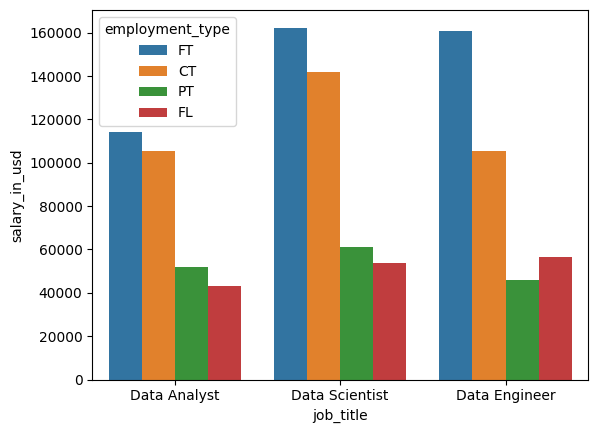

In [29]:
sns.barplot(data = df_1, x = "job_title", y = "salary_in_usd",
            hue = "employment_type", estimator = "mean", errorbar = None)

In [30]:


df_1.columns

Index(['work_year', 'experience_level', 'employment_type', 'salary',
       'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size', 'job_title',
       'is_india'],
      dtype='object')

In [32]:
df_1["employee_residence"].unique()

array(['DE', 'US', 'CA', 'ZA', 'AU', 'UA', 'GB', 'MT', 'IN', 'ES', 'LV',
       'HR', 'LB', 'RO', 'EG', 'PT', 'IE', 'NZ', 'HU', 'VN', 'NG', 'PH',
       'PL', 'FR', 'CZ', 'NL', 'PK', 'LT', 'UG', 'CO', 'IT', 'SI', 'GR',
       'MU', 'AM', 'TH', 'KR', 'EE', 'TR', 'BR', 'QA', 'RU', 'KE', 'TN',
       'GH', 'BE', 'CH', 'AD', 'EC', 'PE', 'MD', 'SA', 'NO', 'AR', 'UZ',
       'GE', 'JP', 'HK', 'CF', 'FI', 'IL', 'AT', 'SG', 'SE', 'MX', 'KW',
       'CY', 'BA', 'IR', 'CN', 'CR', 'PR', 'DK', 'BO', 'DO', 'ID', 'AE',
       'HN', 'DZ', 'IQ', 'BG', 'JE', 'RS', 'CL', 'LU'], dtype=object)

In [33]:
mask = df_1["employee_residence"] ==  "IN"

In [34]:
temp_df =df_1[mask]
temp_df

,work_year,experience_level,employment_type,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_title,is_india
261,2024,MI,FT,3300000,INR,39615,IN,50,IN,L,Data Analyst,IN
804,2024,SE,FT,95000,USD,95000,IN,100,IN,M,Data Analyst,IN
805,2024,SE,FT,80000,USD,80000,IN,100,IN,M,Data Analyst,IN
1896,2023,SE,FT,172700,USD,172700,IN,0,IN,M,Data Engineer,IN
1897,2023,SE,FT,82900,USD,82900,IN,0,IN,M,Data Engineer,IN
...,...,...,...,...,...,...,...,...,...,...,...,...
11489,2021,MI,FT,1672000,INR,22611,IN,0,IN,L,Data Engineer,IN
11500,2021,MI,FT,2500000,INR,33808,IN,0,IN,M,Data Scientist,IN
11545,2021,EN,FT,1335000,INR,18053,IN,100,AS,S,Data Scientist,OTH
11550,2021,MI,FT,1450000,INR,19609,IN,100,IN,L,Data Analyst,IN


In [35]:
temp_df = temp_df.groupby(by=["company_location"])["salary_in_usd"].mean().reset_index()
temp_df

,company_location,salary_in_usd
0,AS,34026.500000
1,AU,70000.000000
2,CH,24322.000000
3,DE,59411.500000
4,ID,53416.000000
5,IN,40944.709091
6,SG,17511.000000
7,US,90841.285714


In [36]:
temp_df.sort_values(by="salary_in_usd" ,ascending = False , inplace = True)
temp_df

,company_location,salary_in_usd
7,US,90841.285714
1,AU,70000.000000
3,DE,59411.500000
4,ID,53416.000000
5,IN,40944.709091
0,AS,34026.500000
2,CH,24322.000000
6,SG,17511.000000


In [37]:
temp_df.head()

,company_location,salary_in_usd
7,US,90841.285714
1,AU,70000.000000
3,DE,59411.500000
4,ID,53416.000000
5,IN,40944.709091


<Axes: xlabel='company_location', ylabel='salary_in_usd'>

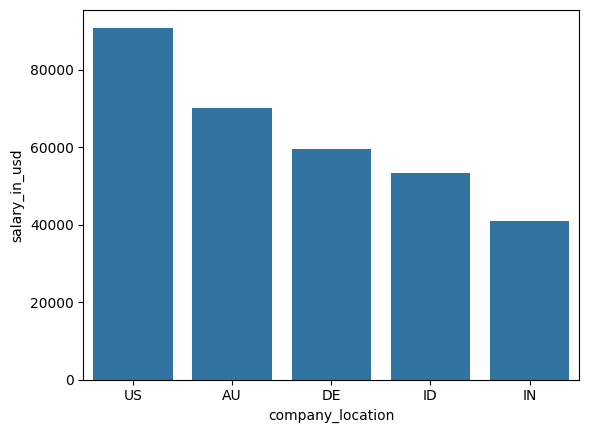

In [38]:
sns.barplot(data = temp_df.head(), x = "company_location", y = "salary_in_usd")

<Axes: xlabel='job_title', ylabel='salary_in_usd'>

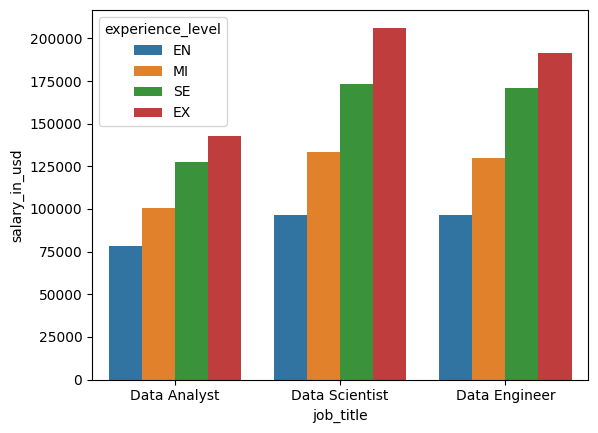

In [39]:
sns.barplot(data = df_1, x = "job_title", y = "salary_in_usd",
            hue = "experience_level", estimator = "mean", errorbar = None,
           hue_order = ["EN", "MI","SE","EX"])

In [40]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'salary',
       'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size', 'job_title',
       'is_india'],
      dtype='object')

In [41]:
df_1["remote_ratio"].unique()

array([  0, 100,  50], dtype=int64)

In [42]:
temp_df = df.groupby(by=["work_year","remote_ratio"])["job_title"].count().reset_index()
temp_df

,work_year,remote_ratio,job_title
0,2020,0,18
1,2020,50,21
2,2020,100,36
3,2021,0,29
4,2021,50,73
5,2021,100,116
6,2022,0,709
7,2022,50,61
8,2022,100,881
9,2023,0,5773


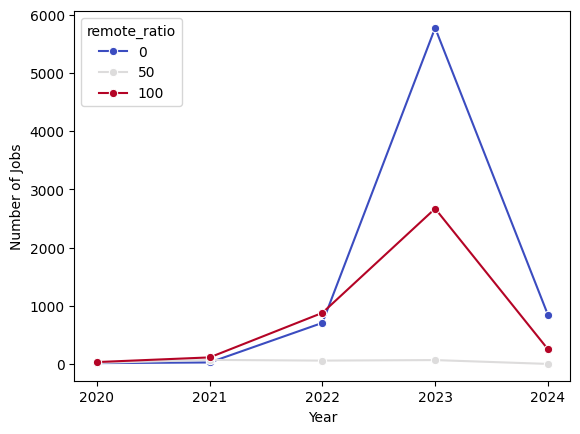

In [44]:
sns.lineplot(data = temp_df, x = "work_year", y = "job_title",
             hue = "remote_ratio", marker = "o", palette = "coolwarm")
plt.xticks(temp_df["work_year"].unique())
plt.ylabel("Number of Jobs")
plt.xlabel("Year")
plt.show()